3.2. Построить кубический сплайн для функции, заданной в узлах интерполяции, предполагая, что сплайн имеет нулевую кривизну при $x = x_0$ иx $x = x_4$ . Вычислить значение функции в точке $x = X^*$.

вариант 23

X* = 0,8

| 1     | 2          | 3          | 4          | 5          | 6          |
| ----- | ---------- | ---------- | ---------- | ---------- | ---------- |
| i     | 0          | 1          | 2          | 3          | 4          |
| X_i   | 0.1        | 0.5        | 0.9        | 1.3        | 1.7        |
| f_i   | 10.0       | 2.0        | 1.1111     | 0.76923    | 0.58824    |


In [84]:
i_arr = [0, 1, 2, 3, 4]
X = [0.1, 0.5, 0.9, 1.3, 1.7]
F = [10.0, 2.0, 1.1111, 0.76923, 0.58824]
x_point = 0.8

In [85]:
def left_c(h):
    n = len(h) - 2
    A = [[0] * n for i in range(n)]

    for i in range(n-1):
        A[i][i] = 2 * (h[i+2] + h[i+1])
        A[i+1][i] = h[i+1]     
        A[i][i+1] = h[i+2] 

    A[n-1][n-1] = 2 * (h[n] + h[n-1])

    return A

def right_c(h, F):
    b = []
    n = 3
    for i in range(n):
        b.append(3 * (((F[i+2] - F[i+1]) / h[i+2]) - ((F[i+1] - F[i]) / h[i+1])))
    return b

def tridiagonal(A, B):
    n = len(A)
    c = [0] * n
    B_prime = [0] * n

    c[0] = A[0][1] / A[0][0]
    B_prime[0] = B[0] / A[0][0]

    for i in range(1, n-1):
        c[i] = A[i][i+1] / (A[i][i] - A[i][i-1] * c[i-1])
        B_prime[i] = (B[i] - A[i][i-1] * B_prime[i-1]) / (A[i][i] - A[i][i-1] * c[i-1])

    B_prime[n-1] = (B[n-1] - A[n-1][n-2] * B_prime[n-2]) / (A[n-1][n-1] - A[n-1][n-2] * c[n-2])

    x = [0] * n
    x[n-1] = B_prime[n-1]

    for i in range(n-2, -1, -1):
        x[i] = B_prime[i] - c[i] * x[i+1]

    return x

In [86]:
def diff(X):
    diff_X = [0]
    for i in range(1, len(X)):
        diff_X.append(X[i] - X[i - 1])
    return diff_X


def searchsorted(X,x):
    for i in range(len(X)):
        if i  >  0:
            if X[i - 1] < x and x <= X[i]:
                return i
            if i == 0 and x <= X[i]:
                return 0
    return len(X)
        
def get_C(h ,F):
    left = left_c(h)
    right = right_c(h, F)
    return [0] + tridiagonal(left, right) + [0]

def cubic_spline_interpolation(x, X, F):
    n = len(X)
    a = F.copy()
    h = diff(X)
    c = get_C(h, F)
    b = [0] * n
    d = [0] * n
    for i in range(n - 1):
        b[i] = (a[i + 1] - a[i]) / h[i+1] - h[i+1] * (c[i + 1] + 2 * c[i]) / 3
        d[i] = (c[i + 1] - c[i]) / (3 * h[i+1])
    
    i = searchsorted(X, x) - 1
    
    dx = x - X[i]
    return a[i] + b[i] * dx + c[i] * dx ** 2 + d[i] * dx ** 3


In [87]:
f_interp = cubic_spline_interpolation(x_point , X, F)

print(f_interp)


1.0145346372767863


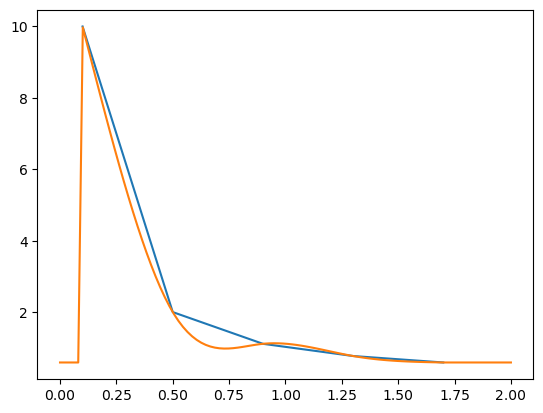

In [88]:
import matplotlib.pyplot as plt
import numpy as np 
XX = np.linspace(0, 2, 100)
plt.plot(X, F)
plt.plot(XX, [cubic_spline_interpolation(x, X, F) for x in XX])
plt.show()